In [192]:
import glob
import pandas as pd
from array import ArrayType
import numpy as np

# This file should run basically insta fast. Bad coding for sure 
# There is a place where i sometimes comment out lin/rbf/sigmoid stuff
# Dont do that, it really helps for some subjects. 
# Anything. Leave only linear. For fast testing of best features
# But dont do that either. 
import os
saveFolderName = "peak"
genSavePath = f"{os.getcwd()}/SavedResults/"

In [193]:
import paradigmSetting
day = "02" # Which month and days result you want to visualize in table
month = 12
# paradigm = paradigmSetting.upDownRightLeftVis()
paradigm = paradigmSetting.upDownInner()
# paradigm = paradigmSetting.rightLeftInner()

#paradigm = paradigmSetting.rightLeftVis()
# paradigm = paradigmSetting.upDownRightLeftInner()
#paradigm = paradigmSetting.upDownVis()
nrOfLabels = 2

paraName = paradigm[0]
cmbSize = 7
repetitionValue = 49
featureSelect = "OnlySepOnlyCurr01th"

labels = np.arange(nrOfLabels)
saveTop = True


In [194]:
repetitionName = f"{paraName}{cmbSize}c{featureSelect}" #"debuggingOnlyCurrthreeAv2correct" #"debuggingOnlyPreNotCurrthreeAv2Correct"# "testAvgDoubleBC4labelsinner2c" # "testAvgDoubleBC4labels1c" # #"peak4-const3-i-ud-global-10-3c"  # "i-ud-global-05-2c" # # "withFixedButWorse3"# #  "udrli1feattestanglnoBC"  # "udrliplotnoAda3"  #  "udrlBC4CVTest" # 
#  "udrliplotnoAda3hyperparams" 
repetitionString = f"{repetitionValue}{repetitionName}"
curSavePath = f"{genSavePath}{day}-{month}-{repetitionString}/"
savedResults = glob.glob(curSavePath + "savedBest*")
if saveTop:
    saveTopName = f"top{cmbSize}{paraName}.npy"
else:
    saveTopName = None
topAmount = 20
skipSubjects = []
onlySignificant = True
minAcc = 0.0
print(len(savedResults))
print(len(savedResults)/9)

63
7.0


In [195]:
def getRes(combinationResult, combinationResultSep, allCombinations, featCombos, label, nrOfCombination, labels): 
    headers = np.arange(nrOfCombination)
    subjectResultArray = np.empty([10, nrOfCombination], dtype=object)
    subjectNrList = []  
    comboAverage = np.zeros([1, nrOfCombination])
    comboTotal = np.zeros([1, nrOfCombination])
    nrOfSubjects = np.zeros(nrOfCombination)
    combResLabel = labels[-1] + 1
    print(labels)
    print(combResLabel)
    print(label)
    topTen = []
    topCombResTen = []
    topThreeAllSubjects = []
    topCombResThreeAllSubjects = []
    topPerFeature = np.zeros([10, len(featCombos)])
    topCombResPerFeature = np.zeros([10, len(featCombos)])
    allCombinations = np.array(allCombinations)
    lowestTopRes = [0, 0]
    for subNr, (cResult, sepResult) in enumerate(zip(combinationResult, combinationResultSep)):
        topThreeThisSubject = []
        topCombResThreeThisSubject = []
        resArray = np.zeros([nrOfCombination])
        if len(cResult) != 0:
            for res, sres in zip(cResult,sepResult):
                cmbNr = int(res[0])
                if onlySignificant == True:
                    if res[1] < minAcc:
                        continue
                res[1] = sres[label+1]
                # print(sres)
                combRes = sres[combResLabel+1]
                # print(combResLabel)
                # print(combResLabel+1)
                comboAverage[0, cmbNr] = comboAverage[0, cmbNr] + res[1]
                comboTotal[0, cmbNr] = comboTotal[0, cmbNr] + res[1]
                nrOfSubjects[cmbNr] += 1
                subjectResultArray[subNr, cmbNr] = res[1]
                comboName = allCombinations[cmbNr][0]
                nameIndex = [i for i, elem in enumerate(featCombos) if comboName == elem][0]
                if combRes > topCombResPerFeature[subNr, nameIndex]:
                    topPerFeature[subNr, nameIndex] = res[1]
                    topCombResPerFeature[subNr, nameIndex] = combRes
                    
                if len(topCombResTen) < 10 or topCombResTen[-1][0] < combRes:

                    if len(topTen) == 10:
                        # topTen.reverse()
                        topTen.pop()
                    if len(topCombResTen) == 10:
                        # topTen.reverse()
                        topCombResTen.pop()

                    dataF = allCombinations[cmbNr][0]
                    kernel =  allCombinations[cmbNr][1]
                    cVal =  allCombinations[cmbNr][2]
                    topTen.append([res[1], subNr, dataF, kernel, cVal])
                    topCombResTen.append([combRes, subNr, dataF, kernel, cVal])
                    topTen.sort(reverse=True)
                    topCombResTen.sort(reverse=True)
                    
                # if len(topCombResThreeThisSubject) > 1:
                #     # print(topCombResThreeThisSubject[0][0])
                #     # print("heyNoni")
                #     # print(topCombResThreeThisSubject[1][0])
                 
                if len(topCombResThreeThisSubject) < 2 or topCombResThreeThisSubject[-1][0] < combRes:
                    
                    
                    if len(topThreeThisSubject) == 2:
                        # topThreeThisSubject.reverse()
                        topThreeThisSubject.pop()
                    if len(topCombResThreeThisSubject) == 2:
                        # print(f"PrePop{topCombResThreeThisSubject}")
                        #topCombResThreeThisSubject.reverse()
                        topCombResThreeThisSubject.pop()
                        # print(f"PostPop{topCombResThreeThisSubject}")
                    dataF = allCombinations[cmbNr][0]
                    kernel =  allCombinations[cmbNr][1]
                    cVal =  allCombinations[cmbNr][2]
                    topThreeThisSubject.append([res[1], subNr, dataF, kernel, cVal])
                    topThreeThisSubject.sort(reverse=True)
                    topCombResThreeThisSubject.append([combRes, subNr, dataF, kernel, cVal])
                    # print(f"PreSort{topCombResThreeThisSubject}")
                    topCombResThreeThisSubject.sort(reverse=True)
                    # print(f"PostSort{topCombResThreeThisSubject}")
                    
                    
        if len(topThreeThisSubject)>0:
            # print(f"PreLastSort{topThreeThisSubject}")
            topThreeThisSubject.sort(reverse=True)
            # print(f"PostLastSort{topThreeThisSubject}")
            topThreeAllSubjects.append(topThreeThisSubject)

        if len(topCombResThreeThisSubject)>0:
            # print(f"PreLastSort{topCombResThreeThisSubject}")
            topCombResThreeThisSubject.sort(reverse=True)
            # print(f"PostLastSort{topCombResThreeThisSubject}")
            topCombResThreeAllSubjects.append(topCombResThreeThisSubject)
        
        
        
    # Print the table!
    comboAverage = comboAverage / nrOfSubjects
    pd.set_option("display.max_columns", None)

    # For loop through zip of headers and columns,
    # If column has all values == None, Remove column and header.
    subjectResultArray = np.array(subjectResultArray)
    emptyCols = []
    atleastOneEmpty = False
    for hcol, in zip(headers):
        if all(subjectResultArray[:,hcol] == None):
            atleastOneEmpty = True
            emptyCols.append(hcol)
    if atleastOneEmpty: 
        subjectResultArray = np.delete(subjectResultArray, np.array(emptyCols),1)
        headers = np.delete(headers, np.array(emptyCols),0)
        comboAverage = np.delete(comboAverage, np.array(emptyCols),1)
        comboTotal = np.delete(comboTotal, np.array(emptyCols),1)
        nrOfSubjects = np.delete(nrOfSubjects, np.array(emptyCols),0)
    return subjectResultArray, comboAverage, comboTotal, nrOfSubjects, headers, topThreeAllSubjects, topTen, topPerFeature


In [196]:
def plotTop(topPerFeature, featCombos, label):
    import matplotlib.pyplot as plt
    meanTop = np.mean(topPerFeature[1:], axis=0)
    indices = np.argsort(meanTop, axis=0)[::-1]

    # print(indices.shape)
    featCombos = np.array(featCombos)

    if len(featCombos) < 30:
        plt.figure(figsize=[15,5])
        plt.boxplot(topPerFeature[1:, indices][:,:30])
        plt.xticks(np.arange(len(featCombos[indices][:30]))+1,featCombos[indices][:30],rotation=45)
        plt.title(f"Avg acc ")
        # print("")
    else: 
        rndmChance = 1/nrOfLabels * 1.15
        print(rndmChance)
        print("julia")
        print(topPerFeature.shape)
        maxPerFeat = np.max(topPerFeature, axis=0)
        print(maxPerFeat.shape)

        lowerThanRndmChance = np.count_nonzero(maxPerFeat[maxPerFeat < rndmChance]) + 1
        #lowerThanRndmChance = np.count_nonzero(topPerFeature)
        print(np.count_nonzero(maxPerFeat[maxPerFeat < rndmChance]))
        print(np.count_nonzero(maxPerFeat))
        # plt.figure(figsize=[30,10])
        # plt.boxplot(topPerFeature[1:, indices][:,:])
        # plt.xticks(np.arange(len(featCombos))+1,featCombos[indices][:],rotation=90)
        # print(featCombos[indices][-30:])
        badCombos = dict()
        worstCombos = dict()
        for combo in featCombos[indices][-lowerThanRndmChance:]:
            combo = combo.split("peak")[0]
            combo = combo.split("const")[0]
            combo = combo.split("late")[0]
            if badCombos.get(combo) is None:
                badCombos[combo] = 1
            else:
                badCombos[combo] += 1
                
        for bcombos in badCombos:
            if badCombos[bcombos] > 2:
                worstCombos[bcombos] = 1
                # print("BadCombo")
                # print(bcombos)
                # print(badCombos[bcombos])
        # plt.title(f"Label {label+1}")
        print("")
        plt.figure(figsize=[15,5])
        plt.boxplot(topPerFeature[1:, indices][:,:10])
        plt.xticks(np.arange(10)+1,featCombos[indices][:10],rotation=90)
        plt.title(f"Avg acc ")
        return worstCombos
        # print("")
        

In [197]:
# All results table
nameDict = dict()
nrOfNames = 0
kernelDict = dict()
nrOfKernel = 0

currSeed = 0
currSubj = 0
combinationList = []

testInfoPerSubject = [None] * 10

results = []
for path in savedResults:
    results.append(np.load(path, allow_pickle=True))

subjectAmount = 10
    
for subject in results:
    currSubj = subject[1]
    testInfoPerSubject[currSubj] = subject[0]
soloFeatures = []
featCombos = []
kernels = testInfoPerSubject[1][2][0]
regValues = testInfoPerSubject[1][2][1]
paradigmName = testInfoPerSubject[1][3]
for subinfo in testInfoPerSubject[1:]:
    if subinfo is None:
        continue
    subSoloFeatures = subinfo[0]
    subfeatCombos = subinfo[1]
    for featCombo in subinfo[1]:
        if featCombo not in featCombos:
            featCombos.append(featCombo)

allCombinations = []
comboNumber = 0
combinationDict = dict()
for featCombo in featCombos:
    for kernel in kernels:
        for regValue in regValues:
            allCombinations.append([featCombo, kernel, regValue, comboNumber])
            combinationDict[f"{featCombo},{kernel},{regValue}"] = comboNumber
            comboNumber = comboNumber + 1

timesPerCombo = np.zeros([comboNumber])
nrOfCombination = len(allCombinations)
combinationResult = np.zeros([subjectAmount, len(allCombinations), 2])
combinationResultSep = np.zeros([subjectAmount, len(allCombinations), nrOfLabels+2])
combinationAmounts = np.zeros([subjectAmount, len(allCombinations)])

nrOfSeedsPerSubject = np.zeros(subjectAmount)
seedCounted = np.zeros([subjectAmount, len(allCombinations), 20])
currSeed = -1
for s, subject in enumerate(results):
    currSubj = 0
    
    subjectBestArray = np.empty([len(subject)], dtype=object)
    
    currSubj = subject[1]

    testInfoPerSubject[currSubj] = subject[0]
    if currSubj in skipSubjects:
        continue
    nrOfSeedsPerSubject[currSubj] += 1

    for aResults in subject[2]:
        for aResults2 in aResults:
            # If the np array comes from svm results
            if len(aResults2) < 10:
                aName = aResults2[0]
                ares = aResults2[1][0]
                sepRes = aResults2[1]
                # print(sepRes)
                # print(ares)
                akernel = aResults2[2]
                aC = aResults2[3]
                timesPerCombo[combinationDict[f"{aName},{akernel},{aC}"]] = timesPerCombo[combinationDict[f"{aName},{akernel},{aC}"]]  + 1
                if combinationDict.get(f"{aName},{akernel},{aC}") is not None:
                    combinationResult[currSubj, combinationDict[f"{aName},{akernel},{aC}"]] = [int(combinationDict[f"{aName},{akernel},{aC}"]), 
                                                                                           combinationResult[currSubj, combinationDict[f"{aName},{akernel},{aC}"]][1] + ares]
                    for ind, seperRes in enumerate(sepRes[1:]):
                        combinationResultSep[currSubj, combinationDict[f"{aName},{akernel},{aC}"]][0] = int(combinationDict[f"{aName},{akernel},{aC}"])
                        combinationResultSep[currSubj, combinationDict[f"{aName},{akernel},{aC}"]][ind+1] += seperRes
                    combinationResultSep[currSubj, combinationDict[f"{aName},{akernel},{aC}"]][-1] += ares
                # print(combinationDict[f"{aName},{akernel},{aC}"])

for subNr, subj in enumerate(combinationResult[1:], 1):

    combinationResult[subNr,:, 1] = combinationResult[subNr,:, 1] / nrOfSeedsPerSubject[subNr]
    combinationResultSep[subNr,:, 1:] = combinationResultSep[subNr,:, 1:]  / nrOfSeedsPerSubject[subNr]
    if "MLP" in kernels:
        combinationResult[subNr,:, 1] = combinationResult[subNr,:, 1] / 2

headers = np.arange(nrOfCombination)
subjectResultArray = np.empty([10, nrOfCombination], dtype=object)
subjectNrList = []

comboAverage = np.zeros([1, nrOfCombination])
comboTotal = np.zeros([1, nrOfCombination])
nrOfSubjects = np.zeros(nrOfCombination)

topTen = []
topThreeAllSubjects = []
topPerFeature = np.zeros([10, len(featCombos)])
allCombinations = np.array(allCombinations)
lowestTopRes = [0, 0]
for subNr, cResult in enumerate(combinationResult):
    topThreeThisSubject = []
    resArray = np.zeros([nrOfCombination])
    if len(cResult) != 0:
        for res in cResult:
            cmbNr = int(res[0])
            if onlySignificant == True:
                if res[1] < minAcc:
                    continue
            comboAverage[0, cmbNr] = comboAverage[0, cmbNr] + res[1]
            comboTotal[0, cmbNr] = comboTotal[0, cmbNr] + res[1]
            nrOfSubjects[cmbNr] += 1
            subjectResultArray[subNr, cmbNr] = res[1]
            comboName = allCombinations[cmbNr][0]
            nameIndex = [i for i, elem in enumerate(featCombos) if comboName == elem][0]
            if res[1] > topPerFeature[subNr, nameIndex]:
                topPerFeature[subNr, nameIndex] = res[1]

            if len(topTen) < 10 or topTen[0][0] < res[1]:

                if len(topTen) == 10:
                    topTen.reverse()
                    topTen.pop()

                dataF = allCombinations[cmbNr][0]
                kernel =  allCombinations[cmbNr][1]
                cVal =  allCombinations[cmbNr][2]
                topTen.append([res[1], subNr, dataF, kernel, cVal])
                topTen.sort()
            
            if len(topThreeThisSubject) < 2 or topThreeThisSubject[0][0] < res[1]:

                if len(topThreeThisSubject) == 2:
                    topThreeThisSubject.reverse()
                    topThreeThisSubject.pop()
                dataF = allCombinations[cmbNr][0]
                kernel =  allCombinations[cmbNr][1]
                cVal =  allCombinations[cmbNr][2]
                topThreeThisSubject.append([res[1], subNr, dataF, kernel, cVal])
                topThreeThisSubject.sort()
    if len(topThreeThisSubject)>0:
        topThreeAllSubjects.append(topThreeThisSubject)
        
        
        
# Print the table!
comboAverage = comboAverage / nrOfSubjects
pd.set_option("display.max_columns", None)

# For loop through zip of headers and columns,
# If column has all values == None, Remove column and header.
subjectResultArray = np.array(subjectResultArray)
emptyCols = []
atleastOneEmpty = False
for hcol, in zip(headers):
    if all(subjectResultArray[:,hcol] == None):
        atleastOneEmpty = True
        emptyCols.append(hcol)
if atleastOneEmpty: 
    subjectResultArray = np.delete(subjectResultArray, np.array(emptyCols),1)
    headers = np.delete(headers, np.array(emptyCols),0)
    comboAverage = np.delete(comboAverage, np.array(emptyCols),1)
    comboTotal = np.delete(comboTotal, np.array(emptyCols),1)
    nrOfSubjects = np.delete(nrOfSubjects, np.array(emptyCols),0)


table = pd.DataFrame(subjectResultArray, columns=headers)
display(table)




0         1         2         3     4         5         6         7     \
0  0.0      None      None      None  None      None      None      None   
1  0.0  0.692857  0.621429  0.564286   0.7  0.507143  0.564286  0.621429   
2  0.0      None      None      None  None      None      None      None   
3  0.0      None      None      None  None      None      None      None   
4  0.0      None      None      None  None      None      None      None   
5  0.0      None      None      None  None      None      None      None   
6  0.0      None      None      None  None      None      None      None   
7  0.0      None      None      None  None      None      None      None   
8  0.0      None      None      None  None      None      None      None   
9  0.0      None      None      None  None      None      None      None   

       8         9     10        11        12        13        14        15    \
0      None      None  None      None      None      None      None      None   
1  0.571429  0.521429  0.65  0.514286  0.578571  0.742857  0.571429  0.592857   
2      None      None  None      None      None      None      None      None   
3      None      None  None      None      None      None      None      None   
4      None      None  None      None      None      None      None      None   
5      None      None  None      None      None      None      None      None   
6      None      None  None      None      None      None      None      None   
7      None      None  None      None      None      None      None      None   
8      None      None  None      None      None      None      None      None   
9      None      None  None      None      None      None      None      None   

       16        17        18        19        20        21        22    \
0      None      None      None      None      None      None      None   
1  0.707143  0.578571  0.557143  0.707143  0.528571  0.607143  0.628571   
2      None      None      None      None      None      None      None   
3      None      None      None      None      None      None      None   
4      None      None      None      None      None      None      None   
5      None      None      None      None      None      None      None   
6      None      None      None      None      None      None      None   
7      None      None      None      None      None      None      None   
8      None      None      None      None      None      None      None   
9      None      None      None      None      None      None      None   

       23        24        25        26        27        28        29    \
0      None      None      None      None      None      None      None   
1  0.578571  0.528571  0.614286  0.535714  0.628571  0.657143  0.621429   
2      None      None      None      None      None      None      None   
3      None      None      None      None      None      None      None   
4      None      None      None      None      None      None      None   
5      None      None      None      None      None      None      None   
6      None      None      None      None      None      None      None   
7      None      None      None      None      None      None      None   
8      None      None      None      None      None      None      None   
9      None      None      None      None      None      None      None   

       30        31        32    33        34        35        36        37    \
0      None      None      None  None      None      None      None      None   
1  0.621429  0.642857  0.657143   0.6  0.678571  0.557143  0.578571  0.671429   
2      None      None      None  None      None      None      None      None   
3      None      None      None  None      None      None      None      None   
4      None      None      None  None      None      None      None      None   
5      None      None      None  None      None      None      None      None   
6      None      None      None  None      None      N

[0 1]
2
0
[0 1]
2
1
(18, 7)
Up
Down


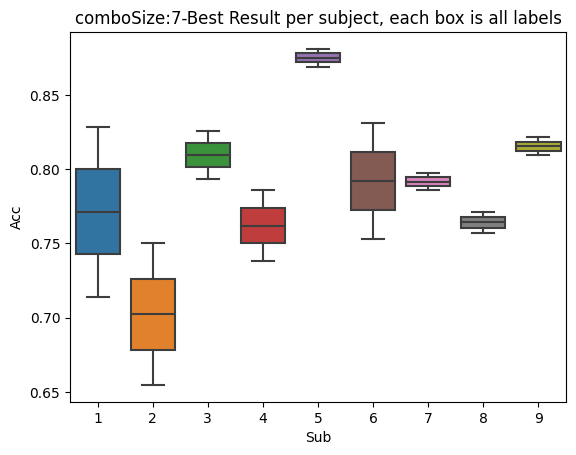

<AxesSubplot: title={'center': 'comboSize:7-Best Result per label, each box is all subjects'}, xlabel='Label', ylabel='Acc'>

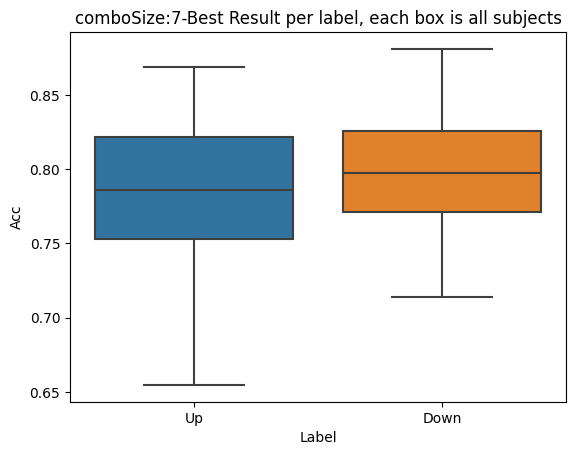

In [198]:
allResults = []
import matplotlib.pyplot as plt
for label in labels:
    subjectResultArray, comboAverage, comboTotal, nrOfSubjects, headers, topThreeAllSubjects, topTen, topPerFeature = getRes(combinationResult = combinationResult, 
        combinationResultSep=combinationResultSep,
        allCombinations=allCombinations, 
        featCombos=featCombos,
        label=label,
        nrOfCombination=nrOfCombination,
        labels=labels)
    table = pd.DataFrame(subjectResultArray[1:], columns=headers, index=np.arange(9)+1)
    newTopTen = []
    for feat in topThreeAllSubjects[1:]:
        newTopTen.append(np.concatenate([feat[0], [label+1, paraName]]))
    newTopTen = np.array(newTopTen)
    allResults.append([subjectResultArray, comboAverage, comboTotal, nrOfSubjects, headers, newTopTen, newTopTen, topPerFeature])
   
    
testDf = pd.DataFrame()
subjectResultArrayList = []
topThreeAllSubjectsList = []
newTopTenList = []

for row in allResults:
    subjectResultArrayList.append(row[0])  
    topThreeAllSubjectsList.append(row[5]) 
    newTopTenList.append(row[6]) 
topThreeAllSubjectsList = np.array(topThreeAllSubjectsList)
topThreeAllSubjectsList = np.reshape(topThreeAllSubjectsList, [-1,topThreeAllSubjectsList.shape[-1] ])
print(topThreeAllSubjectsList.shape)
topDF = pd.DataFrame(topThreeAllSubjectsList, columns = ["Acc", "Sub", "Feat", "Kernel", "C", "Label", "Paradigm" ])
#print(labels)
for label in labels:
    topDF.loc[topDF['Label'] == f"{label+1}", 'Label'] = paradigm[1][1][label][0]
    print(paradigm[1][1][label][0])

import seaborn as sns
topDF["Acc"] = pd.to_numeric(topDF["Acc"])
if saveTop:
    topDF.to_csv(f"topFeaturesResults/topPerSubj-para-{paraName}-cmb-{cmbSize}")
plt.figure()
sns.boxplot(topDF, y = "Acc", x="Sub") # ,  , col="Label"
plt.title(f"comboSize:{cmbSize}-Best Result per subject, each box is all labels")
plt.show()
plt.title(f"comboSize:{cmbSize}-Best Result per label, each box is all subjects")
sns.boxplot(topDF, y = "Acc", x="Label") # , 
#topDF
   

[0 1]
2
2
0.575
julia
(10, 891)
(891,)
33
891

(9, 7)


<Figure size 640x480 with 0 Axes>

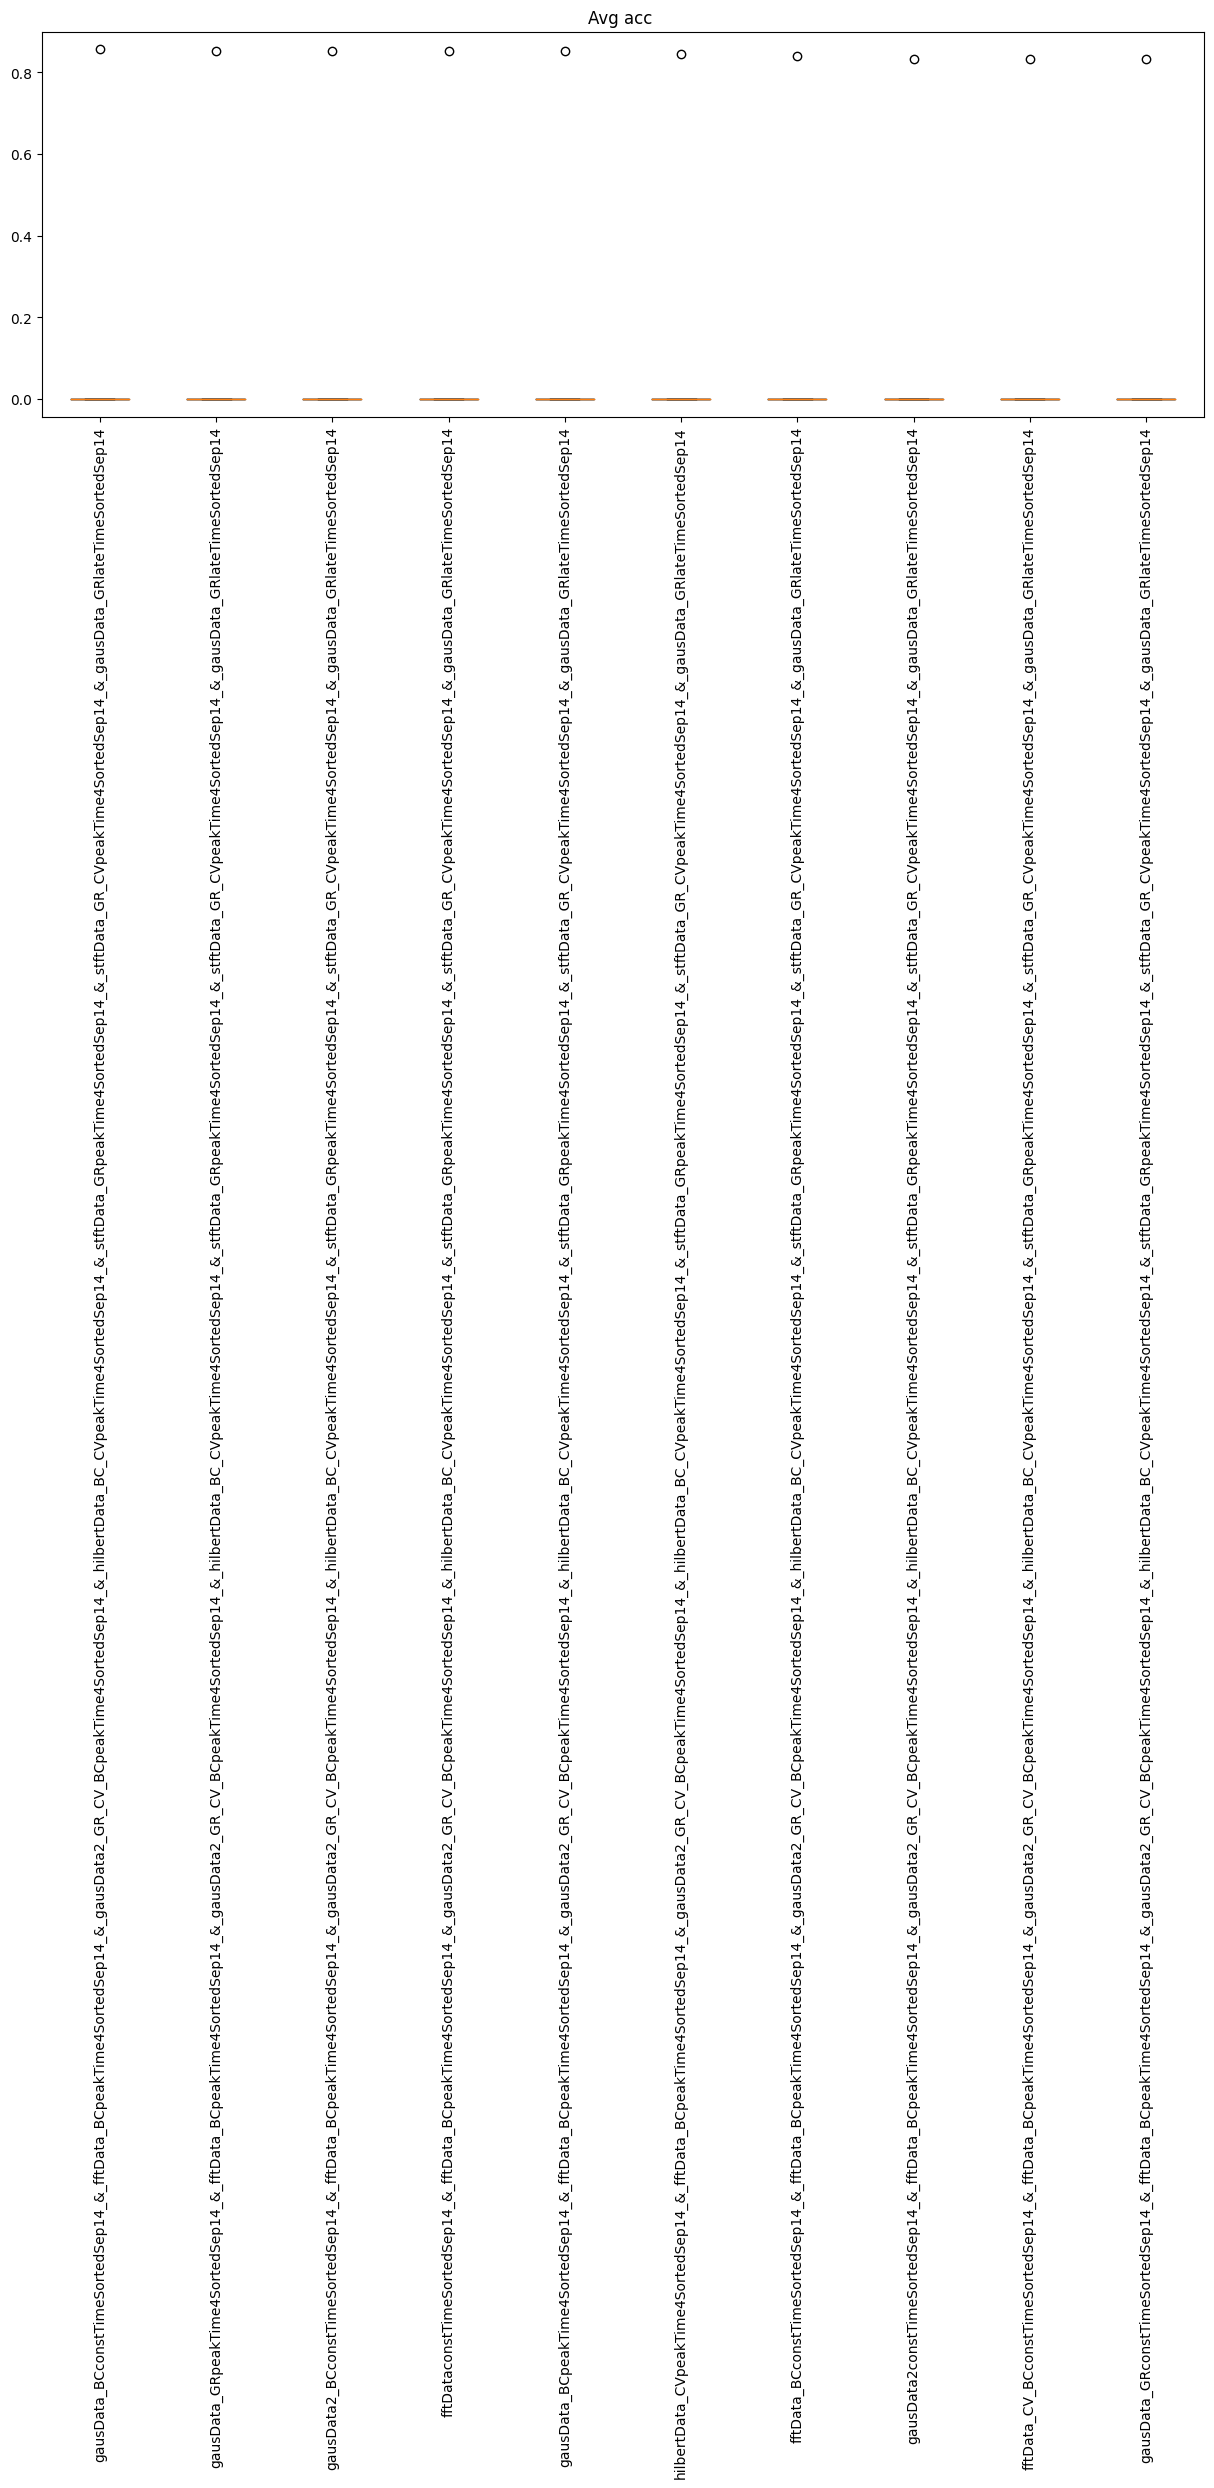

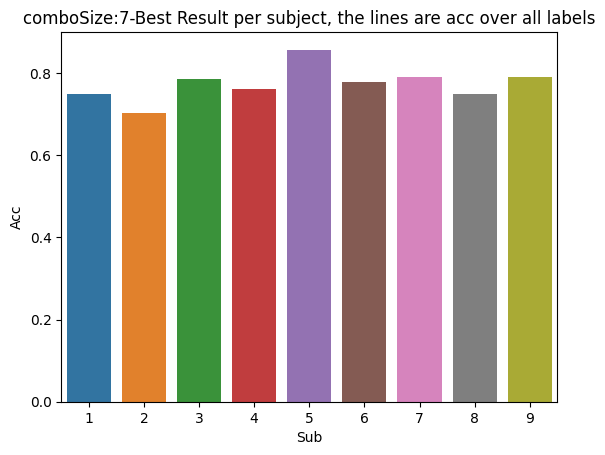

In [199]:
# Average accurracy of all labels
allResults = []
import matplotlib.pyplot as plt

subjectResultArray, comboAverage, comboTotal, nrOfSubjects, headers, topThreeAllSubjects, topTen, topPerFeature = getRes(combinationResult = combinationResult, 
    combinationResultSep=combinationResultSep,
    allCombinations=allCombinations, 
    featCombos=featCombos,
    label=nrOfLabels,
    nrOfCombination=nrOfCombination,
    labels=labels)
table = pd.DataFrame(subjectResultArray[1:], columns=headers, index=np.arange(9)+1)
newTopTen = []
for feat in topThreeAllSubjects[1:]:
    newTopTen.append(np.concatenate([feat[0], [label+1, paraName]]))
newTopTen = np.array(newTopTen)
allResults.append([subjectResultArray, comboAverage, comboTotal, nrOfSubjects, headers, newTopTen, newTopTen, topPerFeature])
plt.figure()
worstCombos = plotTop(topPerFeature, featCombos, label)


testDf = pd.DataFrame()
subjectResultArrayList = []
topThreeAllSubjectsList = []
newTopTenList = []

for row in allResults:
    subjectResultArrayList.append(row[0])  
    topThreeAllSubjectsList.append(row[5]) 
    newTopTenList.append(row[6]) 
topThreeAllSubjectsList = np.array(topThreeAllSubjectsList)
topThreeAllSubjectsList = np.reshape(topThreeAllSubjectsList, [-1,topThreeAllSubjectsList.shape[-1] ])
print(topThreeAllSubjectsList.shape)
topDF = pd.DataFrame(topThreeAllSubjectsList, columns = ["Acc", "Sub", "Feat", "Kernel", "C", "Label", "Paradigm" ])
import seaborn as sns
topDF["Acc"] = pd.to_numeric(topDF["Acc"])
plt.figure()
sns.barplot(topDF, y = "Acc", x="Sub") # ,  , col="Label"
plt.title(f"comboSize:{cmbSize}-Best Result per subject, the lines are acc over all labels")
plt.show()
# plt.title(f"comboSize:{cmbSize}-Best Result per label,  the lines are acc over all labels")
# sns.barplot(topDF, y = "Acc", x="Feat") # , 
   

In [200]:
print(list(worstCombos.keys()))
np.save(f"worstFeatures/worstFeats{cmbSize}{paraName}", list(worstCombos.keys()))


['hilbertData_CV_BC', 'fftData_CV_BC', 'normData_GR_CV', 'fftData_CV']


In [201]:
pd.set_option("display.max_columns", None)
print()
nameDictNrs = np.ones([1, len(nameDict)])
nameDictNrs[0,:] = np.arange(len(nameDict)) * 3
table = pd.DataFrame(topPerFeature, columns=featCombos)
display(table)


fftDatapeakTime4SortedSep14_&_gausData2constTimeSortedSep14_&_gausData_BCpeakTime4SortedSep14_&_gausData2_GR_CVlateTimeSortedSep14_&_gausDataconstTimeSortedSep14_&_gausData_BClateTimeSortedSep14_&_hilbertData_BCconstTimeSortedSep14  \
0                                           0.000000                                                                                                                                                                                         
1                                           0.692857                                                                                                                                                                                         
2                                           0.000000                                                                                                                                                                                         
3                                           0.000000                                                                                                                                                                                         
4                                           0.000000                                                                                                                                                                                         
5                                           0.000000                                                                                                                                                                                         
6                                           0.000000                                                                                                                                                                                         
7                                           0.000000                                                                                                                                                                                         
8                                           0.000000                                                                                                                                                                                         
9                                           0.000000                                                                                                                                                                                         

   hilbertDatapeakTime4SortedSep14_&_gausData2constTimeSortedSep14_&_gausData_BCpeakTime4SortedSep14_&_gausData2_GR_CVlateTimeSortedSep14_&_gausDataconstTimeSortedSep14_&_gausData_BClateTimeSortedSep14_&_hilbertData_BCconstTimeSortedSep14  \
0                                                0.0                                                                                                                                                                                             
1                                                0.7                                                                                                                                                                                             
2                                                0.0                                                                                                                                                                                             
3                                                0.0                                                                                                                                                                                             
4                                                0.0                                                                                                                          

In [202]:
for x in timesPerCombo:
    print(x)

7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0


In [203]:
print("Top ten highest accuracies")

# topTen.reverse()
for top in topTen:
    print(
            f"Accuracy {round(top[0],2)} : subject {top[1]}, feature:{top[2]}, kernel{top[3]}, C:{top[4]}"
        )


Top ten highest accuracies
Accuracy 0.86 : subject 5, feature:gausData_BCconstTimeSortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14, kernelsigmoid, C:2.5
Accuracy 0.85 : subject 5, feature:gausData_GRpeakTime4SortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14, kernelsigmoid, C:2.5
Accuracy 0.85 : subject 5, feature:gausData2_BCconstTimeSortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14, kernelsigmoid, C:2.5
Accuracy 0.85 : subject 5, feature:gausData_BCpeakT

In [204]:
# print("Top ten highest accuracies")
# for subTop in topThreeAllSubjects:
#     subTop.reverse()


In [205]:
# Top results, ordered by subject
arrayOfTopFeatureNames = []
for subTop in topThreeAllSubjects[1:]:
    print("")
    for top in subTop[:-1]:
        arrayOfTopFeatureNames.append(top[2])
        print(
                f"Accuracy {round(top[0],2)} : subject {top[1]}, feature:{top[2]}, kernel{top[3]}, C:{top[4]}"
            )
# np.save(f"topFeaturesResults/{saveTopName}", topThreeAllSubjects[:-1])
np.save(f"topFeaturesResults/{saveTopName}", topThreeAllSubjects[:-1])
arrayOfTopFeatureNames = np.array(arrayOfTopFeatureNames, dtype=object)
newArrayOfTopFeatureNames = []
for topNames in arrayOfTopFeatureNames:
    splitArray = []
    if "_&_" in topNames:
        splitArray = np.array(topNames.split("_&_"), dtype=object)
    else: 
        splitArray = [topNames]

    skip = False  
    if len(splitArray) < cmbSize:
        continue
    newArrayOfTopFeatureNames.append(splitArray)
    
print(newArrayOfTopFeatureNames)
newArrayOfTopFeatureNames = np.array(newArrayOfTopFeatureNames, dtype=object) 
if saveTopName is not None:
    np.save(f"topFeatures/{saveTopName}", newArrayOfTopFeatureNames)
    print("TopFeatureNameArraySaved")
    print(newArrayOfTopFeatureNames)


Accuracy 0.75 : subject 1, feature:gausData2_GR_BCconstTimeSortedSep14_&_gausData2constTimeSortedSep14_&_gausData_BCpeakTime4SortedSep14_&_gausData2_GR_CVlateTimeSortedSep14_&_gausDataconstTimeSortedSep14_&_gausData_BClateTimeSortedSep14_&_hilbertData_BCconstTimeSortedSep14, kernelrbf, C:2.5

Accuracy 0.7 : subject 2, feature:gausDatapeakTime4SortedSep14_&_gausData2lateTimeSortedSep14_&_gausDataconstTimeSortedSep14_&_gausData_GR_CVconstTimeSortedSep14_&_gausData2constTimeSortedSep14_&_gausDatalateTimeSortedSep14_&_gausData_BCconstTimeSortedSep14, kernelrbf, C:2.5

Accuracy 0.79 : subject 3, feature:gausData2constTimeSortedSep14_&_gausData_GRpeakTime4SortedSep14_&_stftDataconstTimeSortedSep14_&_gausData_GRconstTimeSortedSep14_&_gausDatapeakTime4SortedSep14_&_hilbertData_BCconstTimeSortedSep14_&_gausData_GR_BCpeakTime4SortedSep14, kernellinear, C:2.5

Accuracy 0.76 : subject 4, feature:gausData2_BCconstTimeSortedSep14_&_normDatapeakTime4SortedSep14_&_gausData_GR_BCpeakTime4SortedSep14_&

In [206]:
topThreeAllSubjects.sort(reverse=True)

In [207]:
# Top results, ordered by best result

# topThreeAllSubjects.sort()

arrayOfTopFeatureNames = []
for subTop in topThreeAllSubjects[:-1]:
    print("")
    for top in subTop[:-1]:
        arrayOfTopFeatureNames.append(top[2])
        print(
                f"Accuracy {round(top[0],2)} : subject {top[1]}, feature:{top[2]}, kernel{top[3]}, C:{top[4]}"
            )
arrayOfTopFeatureNames = np.array(arrayOfTopFeatureNames, dtype=object)
newArrayOfTopFeatureNames = []
for topNames in arrayOfTopFeatureNames:
    splitArray = []
    if "_&_" in topNames:
        splitArray = np.array(topNames.split("_&_"), dtype=object)
    else: 
        splitArray = [topNames]

    skip = False  
    if len(splitArray) < cmbSize:
        continue
    newArrayOfTopFeatureNames.append(splitArray)
    
# print(newArrayOfTopFeatureNames)
# newArrayOfTopFeatureNames = np.array(newArrayOfTopFeatureNames, dtype=object) 
# if saveTopName is not None:
#     np.save(f"topFeatures/{saveTopName}", newArrayOfTopFeatureNames)
#     print("TopFeatureNameArraySaved")
#     print(newArrayOfTopFeatureNames)


Accuracy 0.86 : subject 5, feature:gausData_BCconstTimeSortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14, kernelsigmoid, C:2.5

Accuracy 0.79 : subject 7, feature:gausData2_BCpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_hilbertData_CVconstTimeSortedSep14_&_hilbertData_BC_CVconstTimeSortedSep14_&_normData_GRconstTimeSortedSep14_&_gausData_GR_CVconstTimeSortedSep14_&_gausData2_BCconstTimeSortedSep14, kernelsigmoid, C:2.5

Accuracy 0.79 : subject 9, feature:fftData_BClateTimeSortedSep14_&_gausData_BCconstTimeSortedSep14_&_stftDatalateTimeSortedSep14_&_hilbertData_CV_BCconstTimeSortedSep14_&_hilbertDatapeakTime4SortedSep14_&_gausData2lateTimeSortedSep14_&_gausData2_GRpeakTime4SortedSep14, kernellinear, C:2.5

Accuracy 0.79 : subject 3, feature:gausData2constTimeSortedSep14_&_gausData_GRpeakTime4Sorte

In [208]:
subjAv = np.zeros(subjectResultArray.shape[0])
for s, subj in enumerate(subjectResultArray):
    subjAv[s] = 0
    if all(subj == None):
        continue
    subjAv[s] = np.mean(subj[np.where(subj != None)])
print(subjAv)
pd.set_option("display.max_columns", None)
table = pd.DataFrame(np.array(comboAverage), columns=headers)
display(table)

print(
    f"Max average accuracy {np.max(np.array(comboAverage[np.where(np.isnan(comboAverage)==False)]))}"
)
maxVal = np.max(np.array(comboAverage[np.where(np.isnan(comboAverage) == False)]))
maxInd = int(np.where(comboAverage == maxVal)[1][0])



[0.         0.6035113  0.58241451 0.65763822 0.67072148 0.71684244
 0.67013859 0.6618728  0.63139981 0.7052373 ]


0         1         2         3     4         5         6         7     \
0  0.000027  0.692857  0.621429  0.564286   0.7  0.507143  0.564286  0.621429   

       8         9     10        11        12        13        14        15    \
0  0.571429  0.521429  0.65  0.514286  0.578571  0.742857  0.571429  0.592857   

       16        17        18        19        20        21        22    \
0  0.707143  0.578571  0.557143  0.707143  0.528571  0.607143  0.628571   

       23        24        25        26        27        28        29    \
0  0.578571  0.528571  0.614286  0.535714  0.628571  0.657143  0.621429   

       30        31        32    33        34        35        36        37    \
0  0.621429  0.642857  0.657143   0.6  0.678571  0.557143  0.578571  0.671429   

       38        39        40        41        42        43    44        45    \
0  0.528571  0.564286  0.578571  0.564286  0.507143  0.542857   0.5  0.564286   

       46        47        48        49        50        51        52    \
0  0.614286  0.592857  0.621429  0.692857  0.614286  0.578571  0.692857   

       53        54        55    56        57        58        59        60    \
0  0.535714  0.507143  0.614286   0.5  0.571429  0.735714  0.535714  0.642857   

       61    62        63        64        65        66        67        68    \
0  0.678571   0.6  0.571429  0.742857  0.557143  0.592857  0.721429  0.578571   

       69    70        71        72        73        74        75        76    \
0  0.585714   0.7  0.607143  0.635714  0.735714  0.607143  0.592857  0.742857   

   77        78        79        80        81        82        83        84    \
0  0.55  0.557143  0.628571  0.535714  0.571429  0.614286  0.542857  0.592857   

       85        86        87    88        89        90        91        92    \
0  0.692857  0.528571  0.557143   0.7  0.535714  0.564286  0.614286  0.557143   

       93        94        95        96    97        98        99    100   \
0  0.621429  0.728571  0.578571  0.507143   0.6  0.528571  0.578571   0.6   

       101       102       103       104       105       106       107   \
0  0.571429  0.592857  0.685714  0.585714  0.578571  0.721429  0.571429   

       108       109       110   111       112       113   114       115   \
0  0.592857  0.635714  0.564286   0.6  0.664286  0.607143   0.6  0.735714   

       116       117       118       119       120       121       122   \
0  0.571429  0.557143  0.621429  0.571429  0.621429  0.657143  0.557143   

       123       124       125       126       127       128       129   \
0  0.571429  0.678571  0.557143  0.592857  0.735714  0.571429  0.585714   

       130       131       132       133       134       135       136   \
0  0.678571  0.592857  0.564286  0.614286  0.571429  0.564286  0.714286   

       137   138       139   140   141       142       143       144   \
0  0.564286  0.55  0.664286  0.55   0.6  0.628571  0.635714  0.564286   

       145       146       147       148   149       150       151       152   \
0  0.614286  0.521429  0.507143  0.664286   0.5  0.635714  0.721429  0.628571   

       153       154       155       156       157       158       159   \
0  0.571429  0.642857  0.571429  0.585714  0.721429  0.564286  0.635714   

       160       161       162       163       164       165       166   167   \
0  0.657143  0.621429  0.585714  0.742857  0.585714  0.585714  0.707143   0.6   

       168   169   170       171       172       173       174       175   \
0  0.614286  0.75   0.6  0.592857  0.735714  0.592857  0.628571  0.621429   

   176       177       178       179       180       181       182       183   \
0   0.6  0.542857  0.614286  0.564286  0.585714  0.721429  0.571429  0.542857   

   184   185       186       187       188       189       190       191   \
0  0.65   0.5  0.557143  0.614286  0.564286  0.578571  0.721429  0.557143   

   192       193       194   195       196       197   198       199   \
0  

Max average accuracy 0.8571428571428573


In [209]:
print("Based on combAverage")
#print(headers[comboAverage.argsort()[0][-5:][::-1]])
top5 = headers[comboAverage.argsort()[0][-5:][::-1]]
top5Vals = comboAverage[0][comboAverage.argsort()[0][-5:][::-1]]
for maxInd,res in zip(top5, top5Vals):
    #print(allCombinations[maxInd][0])
    print(allCombinations[maxInd][0])
    print(allCombinations[maxInd][1])
    print(res)
    print()

Based on combAverage
gausData_BCconstTimeSortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14
sigmoid
0.8571428571428573

gausData_GRpeakTime4SortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14
sigmoid
0.8511904761904763

gausData2_BCconstTimeSortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14
sigmoid
0.8511904761904763

gausData_BCpeakTime4SortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep1

In [210]:
print("Based on combTotal")
top5 = headers[comboTotal.argsort()[0][-5:][::-1]]
top5Vals = comboTotal[0][comboTotal.argsort()[0][-5:][::-1]] /9
for maxInd,res in zip(top5, top5Vals):
    print(allCombinations[maxInd][0])
    print(allCombinations[maxInd][1])
    print(res)
    print()

Based on combTotal
gausData_BCconstTimeSortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14
sigmoid
0.09523809523809526

gausData_GRpeakTime4SortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14
sigmoid
0.09457671957671959

gausData2_BCconstTimeSortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&_stftData_GRpeakTime4SortedSep14_&_stftData_GR_CVpeakTime4SortedSep14_&_gausData_GRlateTimeSortedSep14
sigmoid
0.09457671957671959

fftDataconstTimeSortedSep14_&_fftData_BCpeakTime4SortedSep14_&_gausData2_GR_CV_BCpeakTime4SortedSep14_&_hilbertData_BC_CVpeakTime4SortedSep14_&

In [211]:
def getRes2(combinationResult, combinationResultSep, allCombinations, featCombos, label, nrOfCombination, labels): 
    headers = np.arange(nrOfCombination)
    subjectResultArray = np.empty([10, nrOfCombination], dtype=object)
    subjectNrList = []  
    comboAverage = np.zeros([1, nrOfCombination])
    comboTotal = np.zeros([1, nrOfCombination])
    nrOfSubjects = np.zeros(nrOfCombination)
    combResLabel = labels[-1]
    topTen = []
    topCombResTen = []
    topThreeAllSubjects = []
    topCombResThreeAllSubjects = []
    topPerFeature = np.zeros([10, len(featCombos)])
    topCombResPerFeature = np.zeros([10, len(featCombos)])
    allCombinations = np.array(allCombinations)
    lowestTopRes = [0, 0]
    for subNr, (cResult, sepResult) in enumerate(zip(combinationResult, combinationResultSep)):
        topThreeThisSubject = []
        topCombResThreeThisSubject = []
        resArray = np.zeros([nrOfCombination])
        if len(cResult) != 0:
            for res, sres in zip(cResult,sepResult):
                cmbNr = int(res[0])
                if onlySignificant == True:
                    if res[1] < minAcc:
                        continue
                res[1] = sres[label+1]
                combRes = sres[combResLabel]
                comboAverage[0, cmbNr] = comboAverage[0, cmbNr] + res[1]
                comboTotal[0, cmbNr] = comboTotal[0, cmbNr] + res[1]
                nrOfSubjects[cmbNr] += 1
                subjectResultArray[subNr, cmbNr] = res[1]
                comboName = allCombinations[cmbNr][0]
                nameIndex = [i for i, elem in enumerate(featCombos) if comboName == elem][0]
                if res[1] > topPerFeature[subNr, nameIndex]:
                    topPerFeature[subNr, nameIndex] = res[1]
                    topCombResPerFeature[subNr, nameIndex] = combRes
                    
                if len(topTen) < 10 or topTen[0][0] < res[1]:

                    if len(topTen) == 10:
                        topTen.reverse()
                        topTen.pop()
                    if len(topCombResTen) == 10:
                        topTen.reverse()
                        topTen.pop()

                    dataF = allCombinations[cmbNr][0]
                    kernel =  allCombinations[cmbNr][1]
                    cVal =  allCombinations[cmbNr][2]
                    topTen.append([res[1], subNr, dataF, kernel, cVal])
                    topCombResTen.append([combRes, subNr, dataF, kernel, cVal])
                    topTen.sort()
                    topCombResTen.sort()

                
                if len(topThreeThisSubject) < 2 or topThreeThisSubject[0][0] < res[1]:

                    if len(topThreeThisSubject) == 2:
                        topThreeThisSubject.reverse()
                        topThreeThisSubject.pop()
                    if len(topCombResThreeThisSubject) == 2:
                        topCombResThreeThisSubject.reverse()
                        topCombResThreeThisSubject.pop()
                    dataF = allCombinations[cmbNr][0]
                    kernel =  allCombinations[cmbNr][1]
                    cVal =  allCombinations[cmbNr][2]
                    topThreeThisSubject.append([res[1], subNr, dataF, kernel, cVal])
                    topThreeThisSubject.sort()
                    topCombResThreeThisSubject.append([combRes, subNr, dataF, kernel, cVal])
                    topCombResThreeThisSubject.sort()
                    
        if len(topThreeThisSubject)>0:
            topThreeAllSubjects.append(topThreeThisSubject)
        if len(topCombResThreeThisSubject)>0:
            topCombResThreeAllSubjects.append(topCombResThreeThisSubject)
        
        
        
    # Print the table!
    comboAverage = comboAverage / nrOfSubjects
    pd.set_option("display.max_columns", None)

    # For loop through zip of headers and columns,
    # If column has all values == None, Remove column and header.
    subjectResultArray = np.array(subjectResultArray)
    emptyCols = []
    atleastOneEmpty = False
    for hcol, in zip(headers):
        if all(subjectResultArray[:,hcol] == None):
            atleastOneEmpty = True
            emptyCols.append(hcol)
    if atleastOneEmpty: 
        subjectResultArray = np.delete(subjectResultArray, np.array(emptyCols),1)
        headers = np.delete(headers, np.array(emptyCols),0)
        comboAverage = np.delete(comboAverage, np.array(emptyCols),1)
        comboTotal = np.delete(comboTotal, np.array(emptyCols),1)
        nrOfSubjects = np.delete(nrOfSubjects, np.array(emptyCols),0)
    return subjectResultArray, comboAverage, comboTotal, nrOfSubjects, headers, topThreeAllSubjects, topTen, topPerFeature


(18, 7)
Up
Down


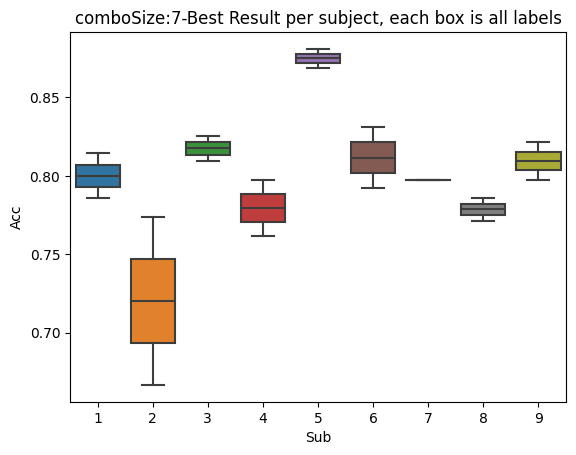

<AxesSubplot: title={'center': 'comboSize:7-Best Result per label, each box is all subjects'}, xlabel='Label', ylabel='Acc'>

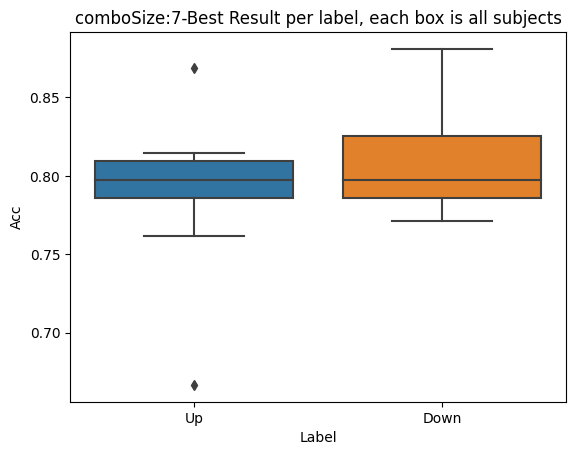

In [212]:
# The results below are taken for best feature and hyperparameters per each feature! Highest classification per feature. 
allResults = []
import matplotlib.pyplot as plt
for label in labels:
    subjectResultArray, comboAverage, comboTotal, nrOfSubjects, headers, topThreeAllSubjects, topTen, topPerFeature = getRes2(combinationResult = combinationResult, 
        combinationResultSep=combinationResultSep,
        allCombinations=allCombinations, 
        featCombos=featCombos,
        label=label,
        nrOfCombination=nrOfCombination,
        labels=labels)
    table = pd.DataFrame(subjectResultArray[1:], columns=headers, index=np.arange(9)+1)
    newTopTen = []
    for feat in topThreeAllSubjects[1:]:
        newTopTen.append(np.concatenate([feat[0], [label+1, paraName]]))
    newTopTen = np.array(newTopTen)
    allResults.append([subjectResultArray, comboAverage, comboTotal, nrOfSubjects, headers, newTopTen, newTopTen, topPerFeature])
    # plotTop(topPerFeature, featCombos, label)
    
testDf = pd.DataFrame()
subjectResultArrayList = []
topThreeAllSubjectsList = []
newTopTenList = []

for row in allResults:
    subjectResultArrayList.append(row[0])  
    topThreeAllSubjectsList.append(row[5]) 
    newTopTenList.append(row[6]) 
topThreeAllSubjectsList = np.array(topThreeAllSubjectsList)
topThreeAllSubjectsList = np.reshape(topThreeAllSubjectsList, [-1,topThreeAllSubjectsList.shape[-1] ])
print(topThreeAllSubjectsList.shape)
topDF = pd.DataFrame(topThreeAllSubjectsList, columns = ["Acc", "Sub", "Feat", "Kernel", "C", "Label", "Paradigm" ])
import seaborn as sns
for label in labels:
    topDF.loc[topDF['Label'] == f"{label+1}", 'Label'] = paradigm[1][1][label][0]
    print(paradigm[1][1][label][0])
topDF["Acc"] = pd.to_numeric(topDF["Acc"])
if saveTop:
    topDF.to_csv(f"topFeaturesResults/topPerLabel-para-{paraName}-cmb-{cmbSize}")
plt.figure()
sns.boxplot(topDF, y = "Acc", x="Sub") # ,  , col="Label"
plt.title(f"comboSize:{cmbSize}-Best Result per subject, each box is all labels")
plt.show()
plt.title(f"comboSize:{cmbSize}-Best Result per label, each box is all subjects")
sns.boxplot(topDF, y = "Acc", x="Label") # , 
   

In [213]:
# table = pd.DataFrame(np.array(comboTotal), columns=headers)
# display(table)

# maxVal2 = np.max(np.array(comboTotal[np.where(np.isnan(comboTotal) == False)]))

# for maxInd2 in np.where(comboTotal == maxVal2)[1]:
#     print(headers[maxInd2])
#     print(nrOfSubjects[maxInd2])
#     print(
#         f"Max total significant accuracy then averaged {maxVal2/nrOfSubjects[maxInd2]} "
#     )
#     print(allCombinations[maxInd2][0])
#     print(allCombinations[maxInd2][1])
#     print(f"C: {allCombinations[maxInd2][2]} ")


In [214]:
for names in featCombos:
    print(names)



fftDatapeakTime4SortedSep14_&_gausData2constTimeSortedSep14_&_gausData_BCpeakTime4SortedSep14_&_gausData2_GR_CVlateTimeSortedSep14_&_gausDataconstTimeSortedSep14_&_gausData_BClateTimeSortedSep14_&_hilbertData_BCconstTimeSortedSep14
hilbertDatapeakTime4SortedSep14_&_gausData2constTimeSortedSep14_&_gausData_BCpeakTime4SortedSep14_&_gausData2_GR_CVlateTimeSortedSep14_&_gausDataconstTimeSortedSep14_&_gausData_BClateTimeSortedSep14_&_hilbertData_BCconstTimeSortedSep14
fftData_CVpeakTime4SortedSep14_&_gausData2constTimeSortedSep14_&_gausData_BCpeakTime4SortedSep14_&_gausData2_GR_CVlateTimeSortedSep14_&_gausDataconstTimeSortedSep14_&_gausData_BClateTimeSortedSep14_&_hilbertData_BCconstTimeSortedSep14
hilbertData_CVpeakTime4SortedSep14_&_gausData2constTimeSortedSep14_&_gausData_BCpeakTime4SortedSep14_&_gausData2_GR_CVlateTimeSortedSep14_&_gausDataconstTimeSortedSep14_&_gausData_BClateTimeSortedSep14_&_hilbertData_BCconstTimeSortedSep14
gausDatapeakTime4SortedSep14_&_gausData2constTimeSortedSep